# An Evaluating of Google Play Store Apps 

Identifying best Apps from various categories 

# Table of Contents:
1. Importing Lbraries

2. Uploading data

3. Features

4. Data Cleaning 

    4.1 Dropping rows with missing values
    
    4.2 Removing unecessary signs and simbols from the dataset
    
    
5. Exploratory Data Analysis 

    5.1 Checking for Muilticolinearity
    
    5.2 Dropping strongly correlated variables in order to avoid confounding effects
    

6. Feature Selection 

7. Scalling 

8. Modelling 

9. Conclusion

# Executive Summary

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

Business problem: Identifying the best Apps in different categories. This is an important question from the business perspective, as it can help companies to understand the customer's current needs are, including costumer's profiling, target audience for certain types os Apps, and feedback for improving currently existing applications. 

# 1. Importing Libraries

In [1]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.figure_factory as ff
import seaborn as sns 
color = sns.color_palette()

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree

import itertools
from vecstack import stacking


import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import random

%matplotlib inline

from mlxtend.plotting import plot_decision_regions
# Binarising our target variable
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 2. Uploading Data

In [2]:
data = pd.read_csv('googleplaystore.csv') # uploads the data in the notebook
x=data #attributes the data also to the value of x for future programming 
data.head(5) #shows the top 5 data rows and all columns in the data grid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Features

 
1. App Name
2. Category
3. Rating (1-5)
4. Number of Reviews
5. Size
6. Number of Insltallations 
7. Type (free or Paid)
8. Price
9. Content Rating (Age Appropriate)
10. Genres
11. Last Update
12. Current Version
13. Android Version 

# 4. Data Cleaning

In [3]:
data.info() #shows the number of rows and columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape #identifies which columns have null values and how many there are

(10841, 13)

In [5]:
data.Rating.max()# exploring scores on the Rating category 

19.0

 Whilst exploring the data, it was observed that the maximum score in the Rating category was 19. This contradicts the rating system, which establishes 5 as the maximim possible score. 

In [6]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is a clear problem with row 10472, hence the row was shifted to the right by one position. 

In [7]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [8]:
data.isnull().sum()# identifies which columns have null values and how many there are

App                  0
Category             2
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
data["Category"].fillna("PHOTOGRAPHY", inplace = True) #As the name of the App clealry indicates which category it belongs to. 
data["Type"].fillna("Free", inplace = True) #As it is the most common type (over 92%)

In [10]:
# observing the remainder missing values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,2,0.000184
Genres,1,0.000092
Last Updated,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Type,0,0.000000
Installs,0,0.000000
Size,0,0.000000


# 4.1 Dropping  rows with missing values 

In [11]:
df1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
# Assessing the number of paid vs free apps
print("Free Apps",len(df1[df1['Type'] == "Free"]))
print("Paid Apps",len(df1[df1['Type'] == "Paid"]))

Free Apps 8715
Paid Apps 645


# 4.2 Removing unecessary signs and simbols from the dataset

In [25]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('k',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('+',''))

In [34]:
df1["Category"]=[each.replace("_"," ") for each in df1.Category]
df1["Price"]=[(str(.replace("$"," "))) for each in df1.Price]

TypeError: replace() takes at least 2 arguments (1 given)

In [18]:
# removing more unecessary simbols and signs from the data set
df1.Installs = df1.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: int(x))

In [19]:
df1.Size=df1.Size.replace('Varies with device',np.nan)
df1.Size=df1.Size.replace('1,000+',1000)

In [21]:
# coercing errors
df1.Reviews = pd.to_numeric(df1.Reviews, errors='coerce')
df1.Price = pd.to_numeric(df1.Price, errors='coerce')
df1.Rating = pd.to_numeric(df1.Rating, errors='coerce')

In [35]:
#Largest App
df1.sort_values('Size',ascending=False)
# there are 1695 rows having  string "Varies with device"
df1.loc[df1['Size'] == 'Varies with device'].shape

unwanted = df1.loc[df1['Size'] == 'Varies with device']
unwanted.shape
df1.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('k',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('+',''))

df1.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
df1['Size'] = pd.to_numeric(df1['Size'],errors='coerce')
df1.sort_values('Size', ascending=False).iloc[0]['App']

'SimCity BuildIt'

In [36]:
df1.isnull().sum() #Double checking for missing values 

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [37]:
df2 = df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #final drop of missing values
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS AND REFERENCE,4.8,44,0.619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


In [38]:
df2.isnull().sum()#final check for missing values 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [39]:
df2.info()#reassessing the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int64
Size              7723 non-null float64
Installs          7723 non-null int64
Type              7723 non-null object
Price             7723 non-null float64
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [40]:
df2.shape

(7723, 13)

In [41]:
# Reset Index Values
df2.reset_index(drop=True, inplace=True)

# 5. Exploratory Data Analysis 

In [42]:
df2.columns # Assessing the features for the exploratory data analysis 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 5.1 Checking for Muilticolinearity

Linear models analyses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions: Linear relationship, Multivariate normality, No or little multicollinearity, No auto-correlation, and Homoscedasticity. Moreover, the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

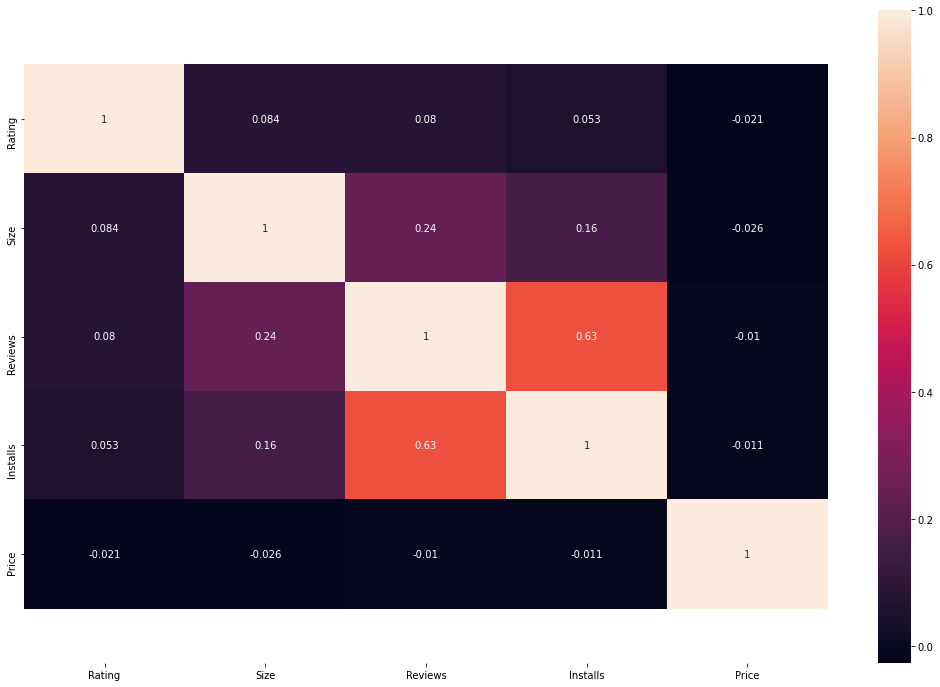

In [43]:
cor_df2 = df2.corr().nlargest(50,'Rating')['Rating'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(df2[cor_df2].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

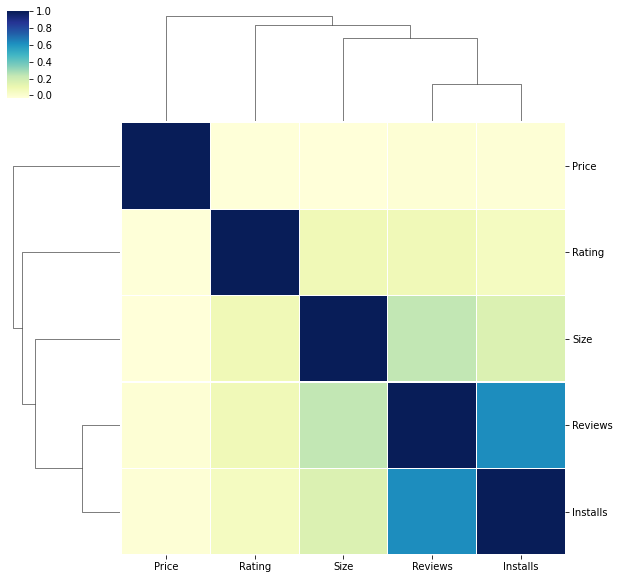

In [44]:
corrmat = df2.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

In [45]:
print(df2.corr())

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.079819  0.083640  0.052693 -0.021320
Reviews   0.079819  1.000000  0.240382  0.626187 -0.010184
Size      0.083640  0.240382  1.000000  0.162707 -0.026272
Installs  0.052693  0.626187  0.162707  1.000000 -0.010852
Price    -0.021320 -0.010184 -0.026272 -0.010852  1.000000


# 5.2 Dropping strongly correlated variables in order to avoid confounding effects

In [46]:
# Correlation matrix
corr_matrix = df2.corr().abs()

In [47]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [48]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [49]:
to_drop

[]

Multicolinearity assumption was met! 

Text(0.5, 1.0, 'TOTAL apps in each category')

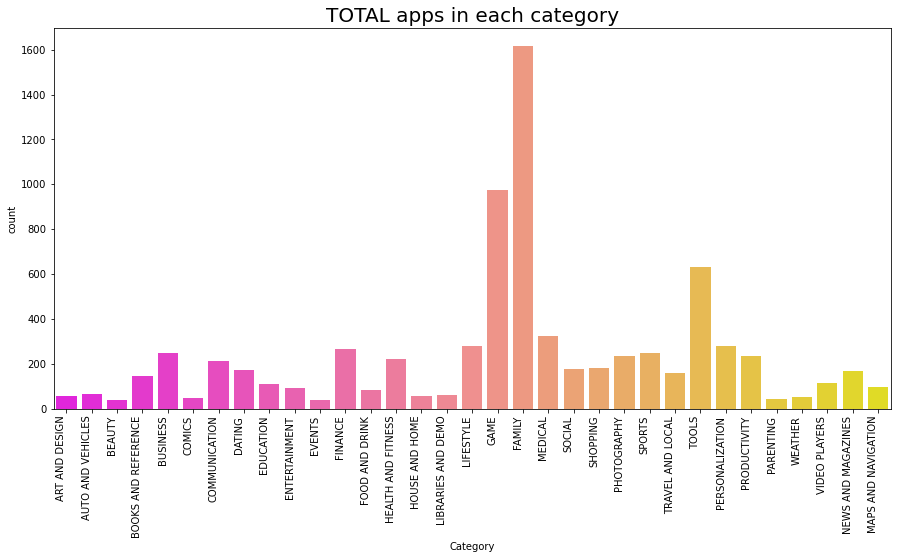

In [54]:
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df2, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)

It can be seen in the above graph, that the most popular App category is Family, and the least popular is the Evetns Category. Amongst the most popular are Games, Medical, tools and photography.  

Text(0.5, 1.0, 'Content Rating distribution')

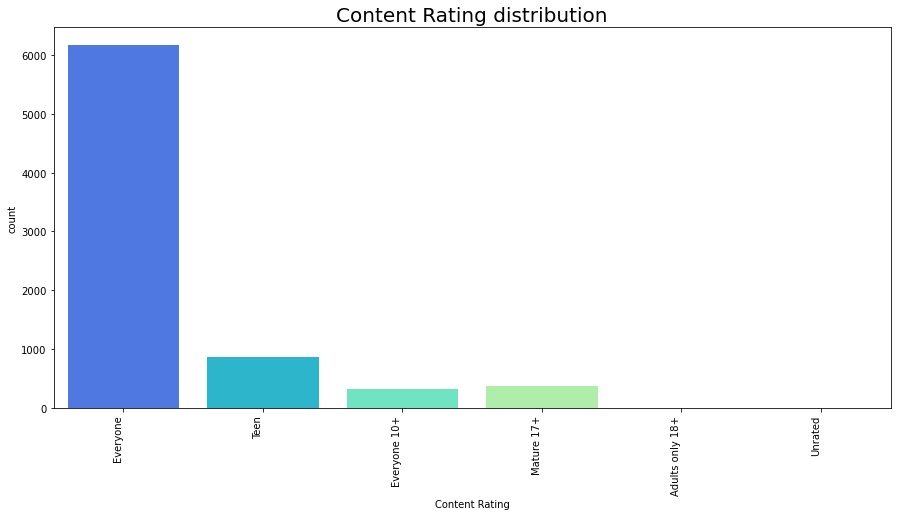

In [85]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df2, palette = "rainbow")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

 
Everyone, Teen Content Rating comprise the majority of ratings across all apps. Conversely, Unrated and Adults ony 18+ have account of the least amounts of ratings.

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

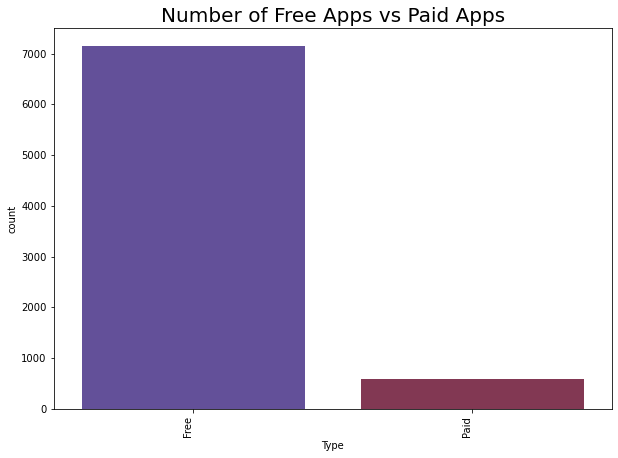

In [63]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df2, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)


The number of free of charge apps totals up to 7588, whereas the number of paid apps sums up to 602.

Text(0.5, 1.0, 'Free and Paid Apps Size Range')

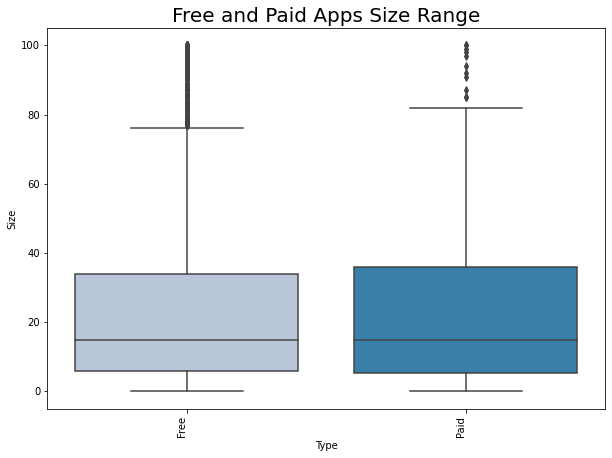

In [79]:
rcParams['figure.figsize'] = 10,7
type_size = sns.boxplot(x="Type",y="Size", data=df2, palette = "PuBu")
type_size.set_xticklabels(type_size.get_xticklabels(), rotation=90, ha="right")
type_size 
plt.title('Free and Paid Apps Size Range',size = 20)

Text(0.5, 1.0, 'Price range for paid Apps (in US Dollars)')

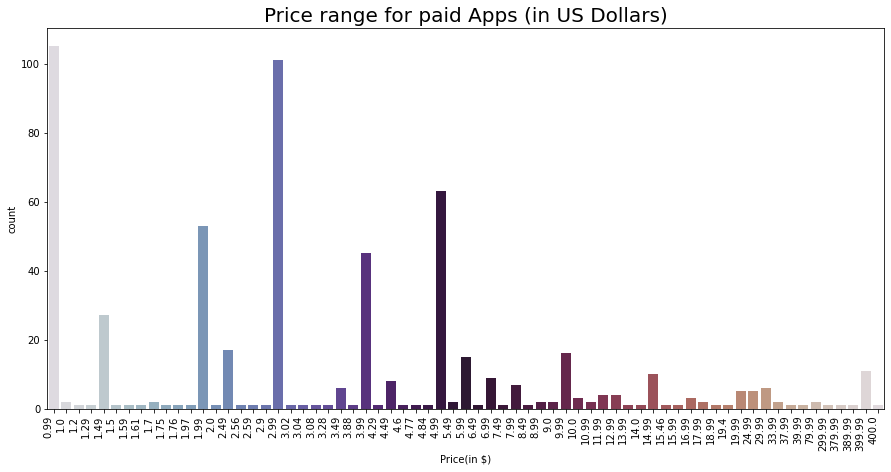

In [78]:
df2['Price(in $)'] = df2['Price'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df2[df2['Price(in $)'] != 0.0]
price_plot = sns.countplot(priced_apps['Price(in $)'], palette = "twilight")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 

plt.title('Price range for paid Apps (in US Dollars)',size = 20)

#
The above graph contains information specific to the Paid Apps type. 
There is a clear preference in price chosen for the paid apps. They include: 0.99, 2.99, 4.99, 1.99, and 3.99 US Dollars. 

Text(0.5, 1.0, 'Installs count distribution')

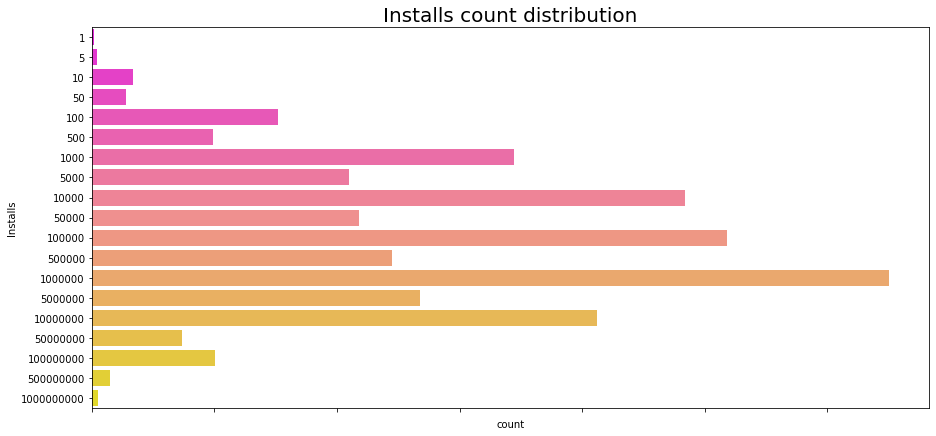

In [86]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df2, palette = "spring")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
install_plot 
plt.title('Installs count distribution',size = 20)


Most of the apps in the dataframe have 1 million installs followed by 10 million and 100k.

Text(0.5, 1.0, 'Rating Distribution')

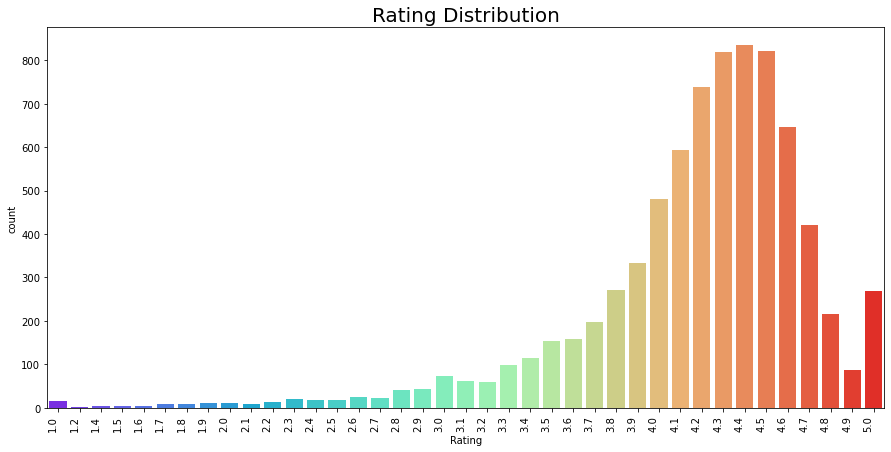

In [88]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df2, palette = "rainbow")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Rating Distribution',size = 20)


The Ratings distribution skewed to the left, with most of the apps are rated between 4.0 and 4.7.

Text(0.5, 1.0, 'CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE')

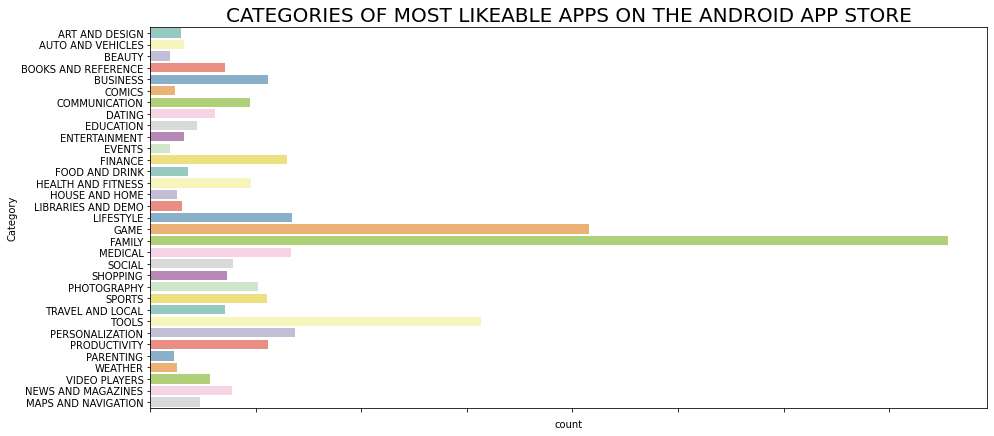

In [91]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=df2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE',size = 20)


Most reviewed apps include Family, Game, Tools, Finance, Lide style and medical apps. 